In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df=pd.read_csv('Statistics_sales_project_data.csv')
df

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40
...,...,...,...,...,...,...
1195,2026-04-10,Physical,Coast,No,9,19206.49
1196,2026-04-11,Physical,Rift Valley,Yes,2,4469.23
1197,2026-04-12,Physical,Rift Valley,No,5,8560.56
1198,2026-04-13,Physical,Central,No,6,8324.26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1200 non-null   object 
 1   store_type          1200 non-null   object 
 2   region              1200 non-null   object 
 3   marketing_campaign  1200 non-null   object 
 4   units_sold          1200 non-null   int64  
 5   revenue             1200 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.4+ KB


In [12]:
df["date"] = pd.to_datetime(df["date"])

Calculate:
Mean
Median
Mode

In [13]:
monthly_revenue = df.groupby(pd.Grouper(key="date", freq="M"))["revenue"].sum()

mean_revenue = monthly_revenue.mean()
median_revenue = monthly_revenue.median()
mode_revenue = monthly_revenue.mode()

C:\Users\USER\AppData\Local\Temp\ipykernel_13536\3417154136.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key="date", freq="M"))["revenue"].sum()


In [14]:
print("Mean Monthly Revenue:", mean_revenue)
print("Median Monthly Revenue:", median_revenue)
print("Mode Monthly Revenue:", monthly_revenue.mode().iloc[0])

Mean Monthly Revenue: 248159.22000000003
Median Monthly Revenue: 250308.555
Mode Monthly Revenue: 105774.81


## Task 1.2 – Dispersion

In [15]:
revenue_range = monthly_revenue.max() - monthly_revenue.min()
variance = monthly_revenue.var()
standard_deviation = monthly_revenue.std()

revenue_range, variance, standard_deviation

(np.float64(198603.55),
 np.float64(1199955651.528995),
 np.float64(34640.37603042142))

### Task 1.3 – Shape of Distribution

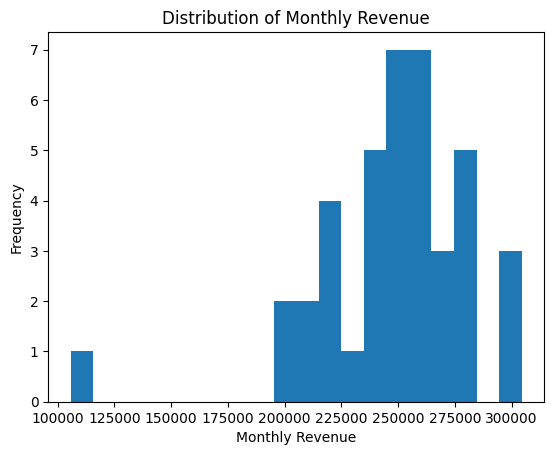

(np.float64(-1.7049887533084118), np.float64(6.215132581062658))

In [17]:
plt.hist(monthly_revenue, bins=20)
plt.xlabel("Monthly Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Revenue")
plt.show()

skewness = monthly_revenue.skew()
kurtosis = monthly_revenue.kurtosis()

skewness,kurtosis


## PART 2: Data Visualization
1. Line Chart – Revenue Over Time

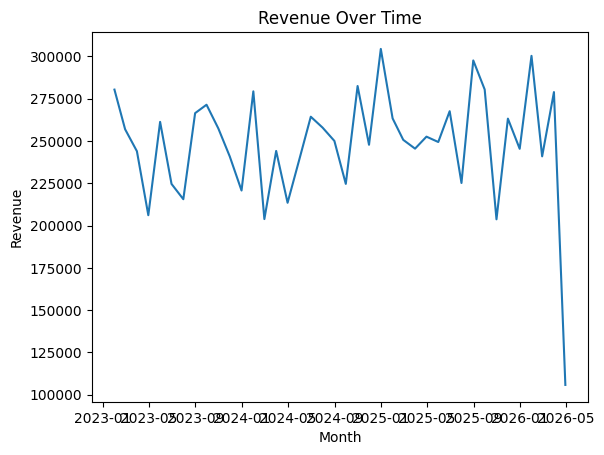

In [18]:
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title("Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


2. Bar Chart – Revenue by Store Type

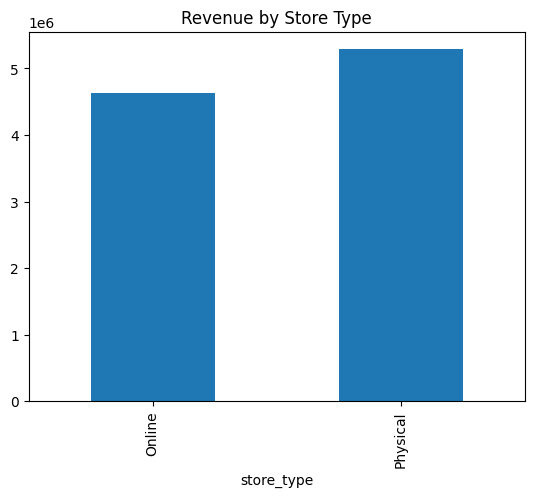

In [19]:
df.groupby("store_type")["revenue"].sum().plot(kind="bar")
plt.title("Revenue by Store Type")
plt.show()


3. Box Plot – Revenue by Region

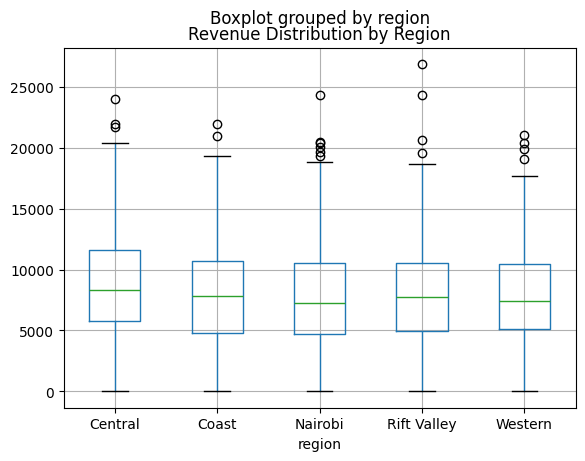

In [20]:
df.boxplot(column="revenue", by="region")
plt.title("Revenue Distribution by Region")
plt.show()


4. Scatter Plot – Marketing Spend vs Revenue

In [ ]:
plt.scatter(df["marketing_spend"], df["revenue"])
plt.xlabel("Marketing Spend")
plt.ylabel("Revenue")
plt.show()


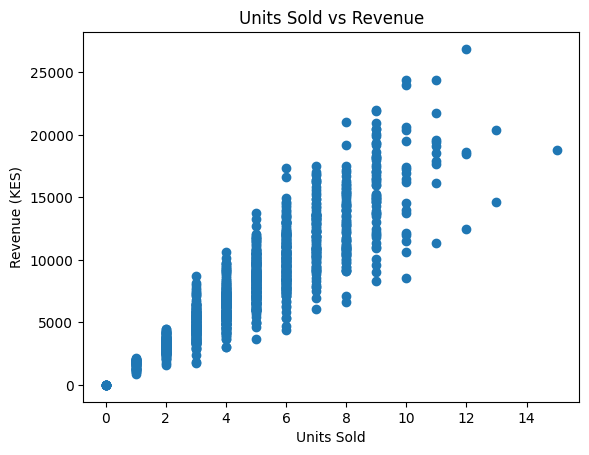

In [26]:

plt.figure()
plt.scatter(df["units_sold"], df["revenue"]) 
plt.title("Units Sold vs Revenue")
plt.xlabel("Units Sold")
plt.ylabel("Revenue (KES)")
plt.show()

## PART 3: Sampling and Bias (Chapter 3)

### Task 3.1 – Population vs Sample


In [27]:
population = "All sales transactions across all stores and regions"
sample = "3-year transaction dataset used in this analysis"

population, sample

('All sales transactions across all stores and regions',
 '3-year transaction dataset used in this analysis')

### Task 3.2 – Sampling Bias

In [28]:
bias_type = "Selection bias due to sampling only urban stores"
impact = "Overestimation of revenue performance"
better_sampling = "Stratified random sampling across regions"

bias_type, impact, better_sampling

('Selection bias due to sampling only urban stores',
 'Overestimation of revenue performance',
 'Stratified random sampling across regions')

## PART 4: Law of Large Numbers and CLT

### Task 4.1 – Law of Large Numbers

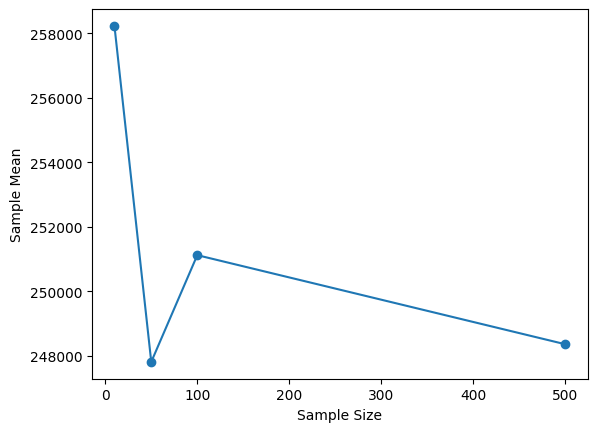

In [30]:
sample_sizes = [10, 50, 100, 500]
means = [np.mean(np.random.choice(monthly_revenue, n)) for n in sample_sizes]

plt.plot(sample_sizes, means, marker='o')
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.show()


### Task 4.2 – Central Limit Theorem

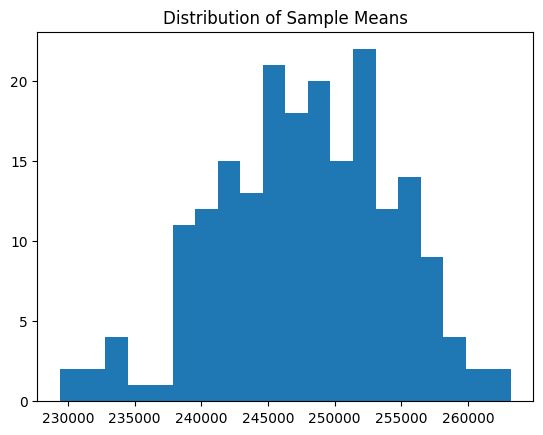

In [32]:
sample_means = [
    np.mean(np.random.choice(monthly_revenue, 30))
    for _ in range(200)
]

plt.hist(sample_means, bins=20)
plt.title("Distribution of Sample Means")
plt.show()


## PART 5: Hypothesis Testing (Chapter 4)
### Task 5.1 – Hypotheses

In [34]:
rev_campaign = df[df["marketing_campaign"] == "Yes"]["revenue"]
rev_no_campaign = df[df["marketing_campaign"] == "No"]["revenue"]

### Task 5.2 – Statistical Test

In [35]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(
    rev_campaign,
    rev_no_campaign,
    alternative="greater"
)

t_statistic, p_value

(np.float64(4.434274857534006), np.float64(5.043041819050511e-06))

## PART 6: Errors and Interpretation (Chapter 5)

### Task 6.1 – Errors

In [37]:
type_I_error = "Concluding marketing increases revenue when it does not"
type_II_error = "Failing to detect a real marketing effect"

type_I_error, type_II_error

('Concluding marketing increases revenue when it does not',
 'Failing to detect a real marketing effect')

## PART 7: Effect Size and Power

### Task 7.1 – Effect Size

In [39]:
cohens_d = (
    rev_campaign.mean() - rev_no_campaign.mean()
) / np.sqrt(
    (rev_campaign.var() + rev_no_campaign.var()) / 2
)

cohens_d

np.float64(0.26177149115311116)

### Task 7.2 – Power Discussion

In [40]:
power_reason = "Low sample size or high variance can reduce power"
recommendation = "Collect more data to increase statistical power"

power_reason, recommendation

('Low sample size or high variance can reduce power',
 'Collect more data to increase statistical power')